# Iris Flower Classification


**Author Name:** Talha Aslam

**Email:** ranatalha30055@gmail.com

**Github:** [Github](https://github.com/TalhaAslam44)

**LinkedIn:** [LinkedIn](https://www.linkedin.com/in/talha-aslam-2693661b7/)

![Iris](iris.jpg)

# About the Dataset


## Context

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines


## Content

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

## Acknowledgements
This dataset is free and is publicly available at the UCI Machine Learning Repository

This data set has been downloaded from kaggle from following [link](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

# Importing the liberaries

In [1]:
# import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Machine learning Liberaries

In [2]:
# import Machine Learning liberaries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading 

>  Load the csv file with the pandas.

> creating the dataframe and understanding the data present in the dataset using pandas.

> Dealing with the missing data, outliers and the incorrect records.
    

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
# let's have look on the head of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# let's check the shape of data
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


--- 
### Observations

- Number of rows = 150 and number of columns = 5.
- We can see names of the columns.
- No missing values.
- 4 float data type columns and 1 object data type.
- We can see the data type of each column.

# Dealing with missing values

In [7]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

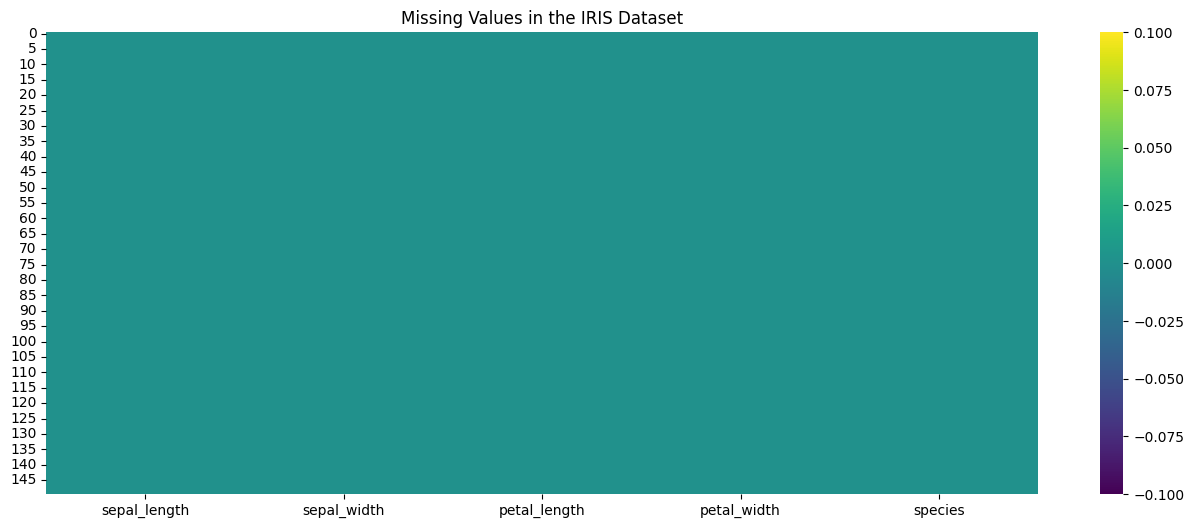

In [8]:
# Let's see missing values in heatmap
plt.figure(figsize = (16, 6))
sns.heatmap(data = df.isnull(), cbar = True, cmap = 'viridis')
plt.title('Missing Values in the IRIS Dataset')
plt.show()

---
### Observations

- No missing values to be found.

# Duplicate Rows

In [9]:
# Let's check for duplicates 
df.duplicated().sum()

3

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Let's remove these duplicated rows
df.drop_duplicates(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


---
### Observations

- After removing duplicates rows we left with 147 rows.

In [14]:
# Let's have look on columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

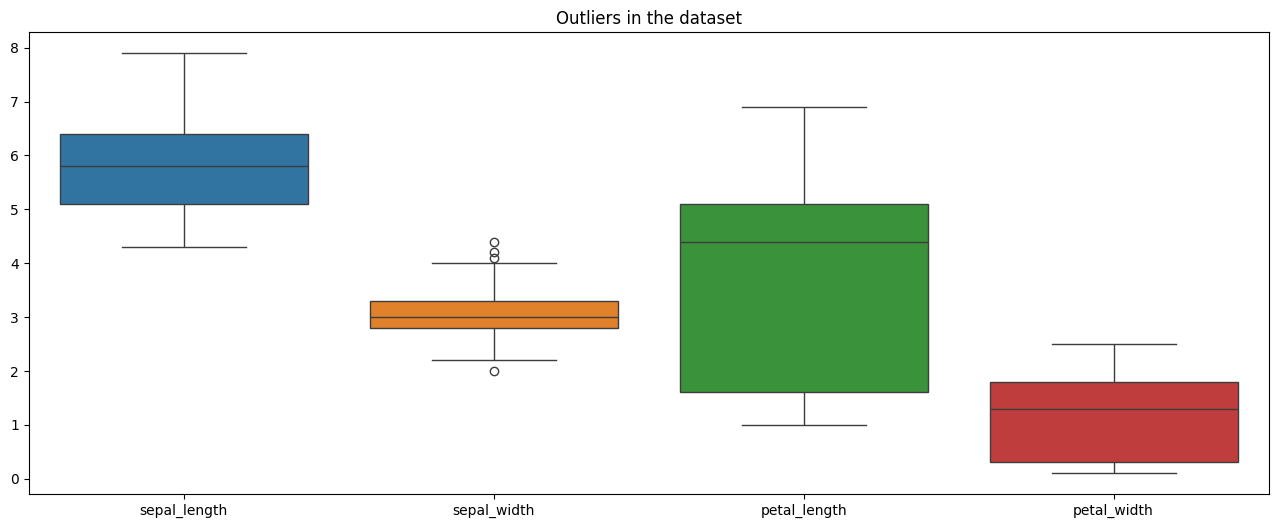

In [15]:
# Check for outliers
plt.figure(figsize = (16, 6))
sns.boxplot(data = df)
plt.title('Outliers in the dataset')
plt.show()

---
### Observations

- No outliers in sepal_length, petal_length, and petel_width.
- Outliers in sepel_width.

In [16]:
df['sepal_width'].value_counts()

sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    10
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Let's the percentage of species in the dataset
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

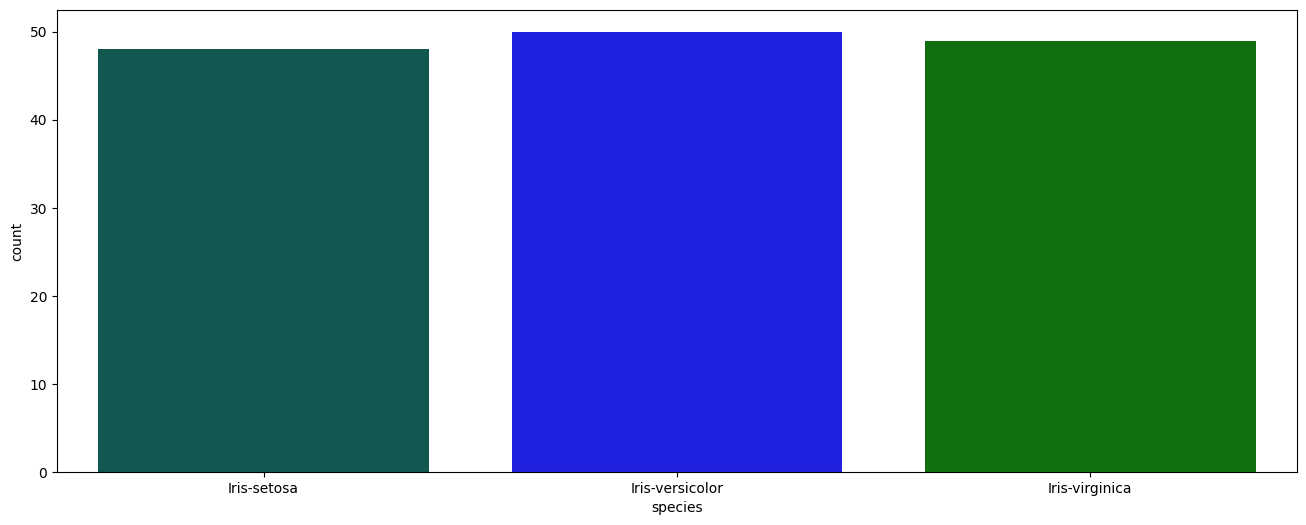

In [20]:
# Let's plot them
plt.figure(figsize = (16, 6))
color = ['#056559', 'blue', 'green']
sns.countplot(data = df, x = 'species', palette = color )

---
### observations

- We can see the value counts of each species. 

In [21]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
24,4.8,3.4,1.9,0.2,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


#  Checking correlation

In [22]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
# Let's check the correlation of the dataset
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


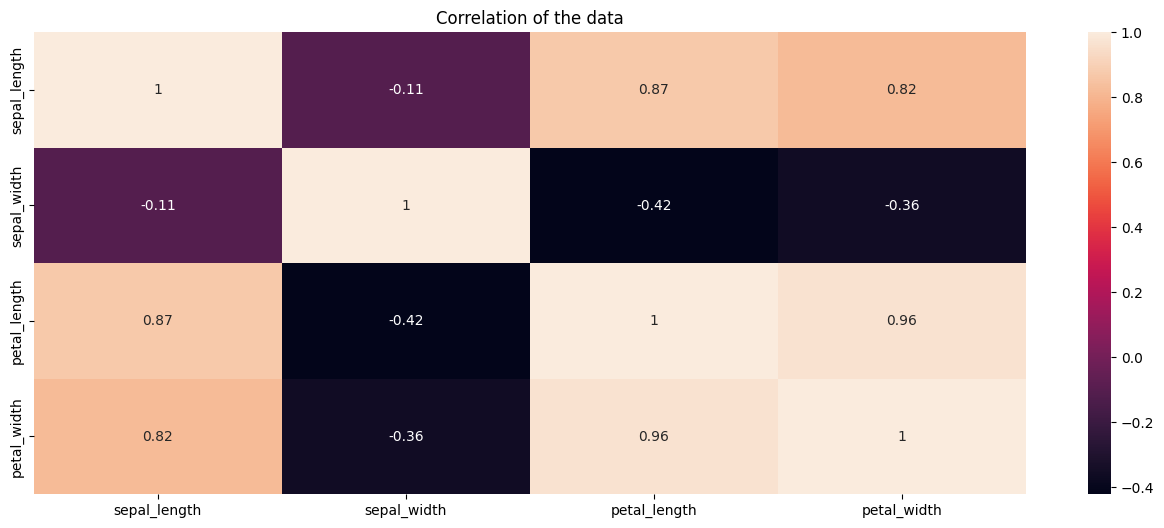

In [24]:
# ploting the correlation
plt.figure(figsize = (16, 6))
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True)
plt.title('Correlation of the data')
plt.show()

---
### Observations

- shows high positive correlation.
- 0 shows no correlation.
- -1 shows negative high correlation.


# Model Building

### We have to make model that is use for classification of species

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Let's choose Features (X) and Lables (y)
X = df.drop('species', axis = 1)
y = df['species']

In [28]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [29]:
# Call the model
rfc = RandomForestClassifier()

In [30]:
# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predict the model
y_pred = rfc.predict(X_test)

In [32]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [33]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

Accuracy Score: 0.9333333333333333
Confusion Matrix: 
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



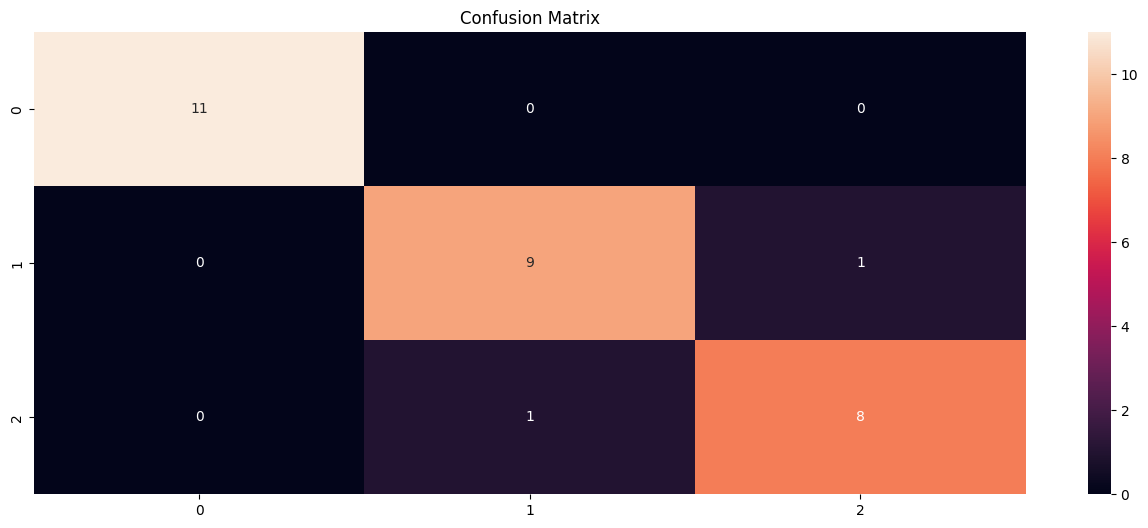

In [35]:
# Let's plot the confusion matrix
plt.figure(figsize = (16, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title('Confusion Matrix')
plt.show()

---
### Observations

- Accuracy Score = 0.93%

# Saving and Loading the Model

In [36]:
import pickle
pickle.dump(rfc, open('iris.model.pkl', 'wb'))

In [37]:
pickle.load(open('iris.model.pkl', 'rb'))

RandomForestClassifier()

# Now, Let's use the model on unseen data

In [40]:
rfc.predict([[4.6, 5.2, 2.9, 2.0]])


array(['Iris-versicolor'], dtype=object)

---
### Observations

- According to given unseen data RandomForestClassifier classifies the flower as versicolor.